In [1]:
import numpy as np
import time
from os import getcwd, path
from pathlib import Path

# np load error fix
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

from sys import path as sp
sp.append(path.join((Path.cwd()).parent,"scripts"))


In [2]:
from pynq import Overlay
from pynq import allocate
import pynq

root = getcwd()
BIT = path.join(root, 'conv_design_0.bit')

ModuleNotFoundError: No module named 'pynq'

# Initialisation

outputs: <br>
0: Grenade
1: Reload
2: Exit
3: Shield
4: IDLE
5: IGNORE

In [2]:
from filepaths import paths
from start_detector_tensor import Detector

In [3]:
fpga_detector = Detector()

# Live Testing

In [ ]:
# Constant stream of 6 datapoints
input_stream = []
state_of_game = True # In Gameplay

while (state_of_game):
    predicted_outcome = fpga_detector.eval_data(input_stream)
    print(predicted_outcome)
    # Do whatever with outcome

# Falsify Data (Pre-live implementation of sensor)

In [4]:
from dataloader import get_real_testdata, load_to_df, unlink_DStore
from model_utils_training import scale_vals

In [5]:
testfiles=get_real_testdata()
train_cols = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'Activity_code']
test_cols = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'Activity_code']
targetfiles = testfiles
cols = test_cols

targetfiles = unlink_DStore(targetfiles)
targetfiles[:]

[PosixPath('/Users/anderson/Desktop/github/capstoneml/datasets/test/IMU_nds_test.txt')]

In [6]:
train_classes = ['exit','reload','grenade','shield','idle']

idx = 0
df = load_to_df(targetfiles[:], cols)
df[train_cols[6]] = df[train_cols[6]].str.slice(start=0, stop=-1)
df = df[df['Activity_code'].isin(train_classes)]
df[cols[:6]] = df[cols[:6]].astype('int')
df = df[(df[cols[:6]] <= 255).all(axis=1)]
df = df[(df[cols[:6]] >= 0).all(axis=1)]

df_copy = df.copy()
timestep = 20
data = scale_vals(df_copy)

testing_class = [data.iloc[i].tolist()[:data.shape[1]-1] for i in range(data.shape[0])]

In [7]:
out = []
for d in testing_class:
    o = fpga_detector.eval_data(d)
    out.append(o)

[[[0.83529412 0.79215686 0.80392157 0.76862745 0.6745098  0.58431373]
  [0.56862745 0.52941176 0.50196078 0.58039216 0.6        0.60392157]
  [0.58823529 0.61960784 0.70196078 0.74509804 0.70196078 0.67843137]
  [0.69803922 0.73333333 0.44705882 0.48235294 0.50980392 0.51372549]
  [0.49803922 0.50588235 0.53333333 0.5254902  0.50588235 0.54901961]
  [0.58039216 0.58823529 0.59215686 0.60392157 0.60392157 0.61176471]
  [0.63137255 0.63529412 0.65882353 0.68627451 0.22352941 0.29803922]
  [0.41960784 0.52156863 0.57254902 0.58823529 0.6        0.56862745]
  [0.56862745 0.61960784 0.63137255 0.65098039 0.6627451  0.68235294]
  [0.70588235 0.73333333 0.75294118 0.79215686 0.82745098 0.87843137]
  [0.55686275 0.57254902 0.60784314 0.65098039 0.69411765 0.7254902 ]
  [0.74509804 0.72941176 0.72156863 0.69803922 0.69803922 0.69803922]
  [0.69411765 0.68627451 0.67843137 0.67058824 0.65882353 0.66666667]
  [0.6627451  0.64313725 0.69803922 0.8        0.85490196 0.89411765]
  [0.87843137 0.8039

/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["a"]=np.linalg.norm((data["ax"],data["ay"],data["az"]), axis=0)
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["g"]=np.linalg.norm((data["gx"],data["gy"],data["gz"]), axis=0)
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

NOW 2 AND [2]
[[[0.7254902  0.65882353 0.56078431 0.49019608 0.43921569 0.40784314]
  [0.36078431 0.3254902  0.27843137 0.30196078 0.36470588 0.3254902 ]
  [0.29803922 0.32156863 0.42352941 0.49411765 0.48235294 0.42745098]
  [0.34901961 0.29019608 0.71372549 0.72941176 0.74117647 0.74901961]
  [0.76862745 0.81960784 0.88235294 0.9254902  0.92941176 0.90196078]
  [0.89019608 0.92941176 0.94117647 0.91764706 0.89803922 0.90196078]
  [0.90588235 0.89411765 0.88627451 0.8745098  0.96078431 0.96470588]
  [0.96470588 0.96470588 0.96470588 0.96470588 0.96470588 0.96470588]
  [0.96470588 0.96470588 0.96470588 0.96078431 0.9372549  0.9372549 ]
  [0.95294118 0.91764706 0.83921569 0.77254902 0.72156863 0.70588235]
  [0.6        0.59215686 0.58039216 0.56078431 0.5372549  0.50196078]
  [0.4745098  0.43921569 0.39607843 0.34117647 0.31764706 0.29019608]
  [0.2627451  0.25490196 0.23529412 0.21176471 0.2        0.18431373]
  [0.17254902 0.16470588 0.56078431 0.55686275 0.53333333 0.49803922]
  [0.4

/Users/anderson/Desktop/github/capstoneml/scripts/start_detector_tensor.py:95: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  res_mode = stats.mode(tmp_res)[0][0]
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["a"]=np.linalg.norm((data["ax"],data["ay"],data["az"]), axis=0)
/Users/anderson/Desktop/github/capstoneml/

NOW 0 AND [0]
[[[0.77647059 0.81960784 0.88235294 0.95294118 0.81176471 0.61568627]
  [0.70196078 0.8745098  0.93333333 0.90980392 0.89019608 0.89019608]
  [0.86666667 0.80784314 0.65490196 0.64705882 0.71764706 0.81176471]
  [0.8745098  0.91372549 0.52156863 0.56078431 0.54509804 0.51372549]
  [0.3254902  0.29019608 0.30196078 0.32941176 0.36862745 0.43529412]
  [0.51764706 0.56862745 0.62352941 0.66666667 0.75294118 0.79215686]
  [0.82352941 0.88235294 0.9372549  0.96470588 0.45882353 0.41176471]
  [0.38431373 0.37254902 0.79215686 0.87843137 0.95294118 0.96470588]
  [0.96470588 0.96470588 0.96470588 0.96470588 0.96470588 0.96470588]
  [0.96470588 0.96470588 0.96470588 0.96470588 0.96470588 0.96470588]
  [0.31372549 0.29803922 0.26666667 0.23921569 0.03137255 0.03137255]
  [0.03137255 0.03137255 0.03137255 0.03137255 0.03137255 0.03137255]
  [0.04705882 0.07843137 0.13333333 0.16862745 0.19215686 0.21960784]
  [0.23529412 0.24705882 0.34901961 0.35686275 0.36862745 0.4       ]
  [0.8

/Users/anderson/Desktop/github/capstoneml/scripts/start_detector_tensor.py:95: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  res_mode = stats.mode(tmp_res)[0][0]
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["a"]=np.linalg.norm((data["ax"],data["ay"],data["az"]), axis=0)
/Users/anderson/Desktop/github/capstoneml/

1/1 [==============================] - 0s 7ms/step
NOW 2 AND [2]


/Users/anderson/Desktop/github/capstoneml/scripts/start_detector_tensor.py:95: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  res_mode = stats.mode(tmp_res)[0][0]
/Users/anderson/Desktop/github/capstoneml/scripts/dataloader.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["a"]=np.linalg.norm((data["ax"],data["ay"],data["az"]), axis=0)
/Users/anderson/Desktop/github/capstoneml/

In [8]:
keep=[]
for i in range(0,len(out)):
    if out[i]!=5:
        keep.append(i)
    
for i in keep:
    print(out[i], end=", ")


2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [9]:
import matplotlib.pyplot as plt
from visualisers import plot_full_v2

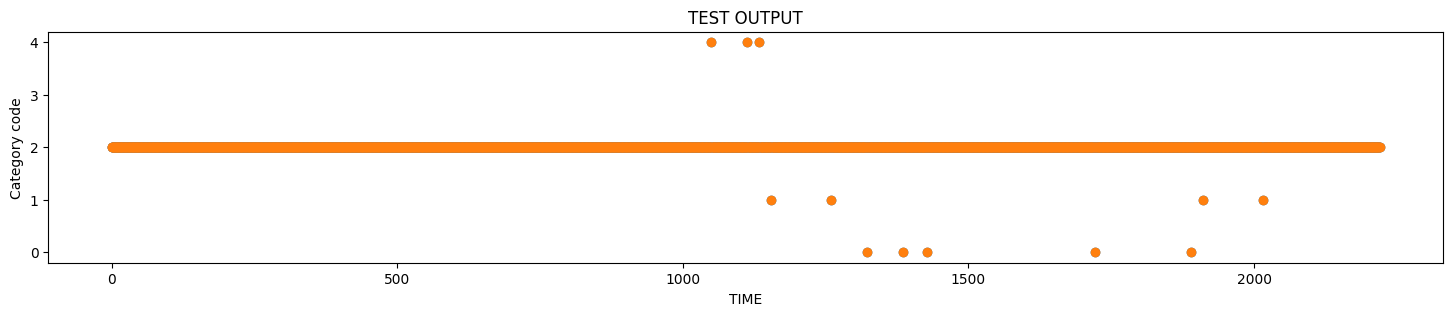

In [10]:
# y_data = [out[i] for i in (keep)]
# x_data = [i for i in range(len(keep))]
y_data = [i for i in (out)]
x_data = [i for i in range(len(out))]
plt.rcParams["figure.figsize"] = (18,3)
plt.scatter(x_data, y_data, label='prediction')
plt.scatter(x_data, y_data, label='prediction')
plt.xlabel('TIME')
plt.ylabel('Category code')
plt.title('TEST OUTPUT')
# plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


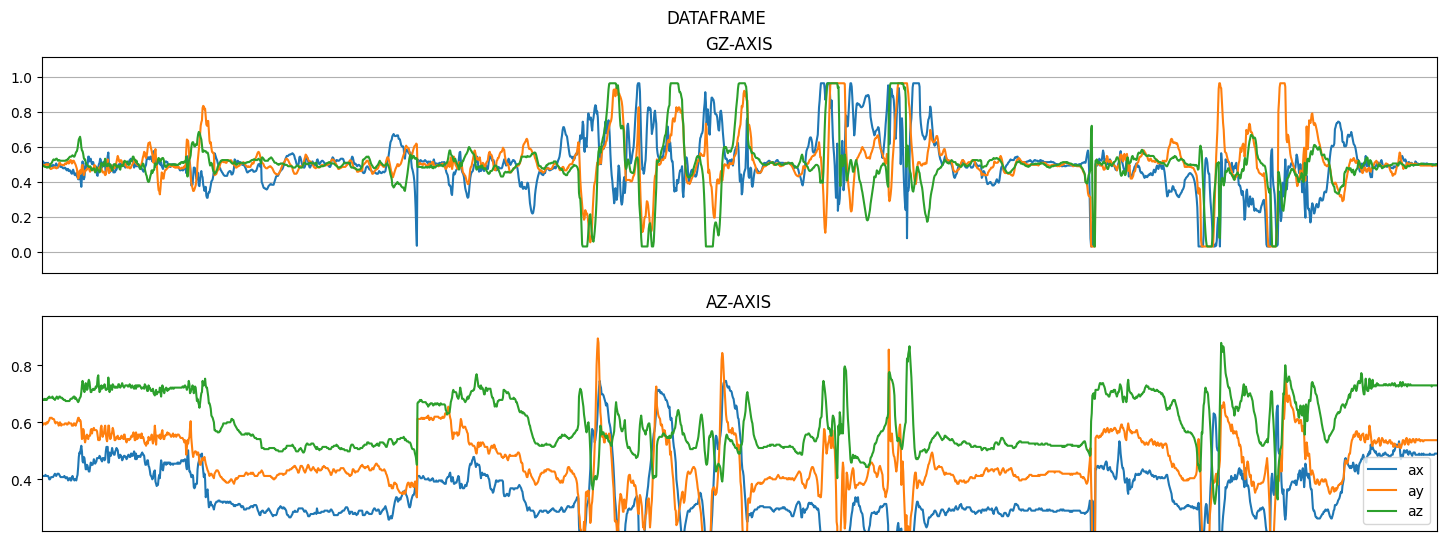

In [11]:
df_copy['time']=[i+1 for i in range(df.shape[0])]
plot_full_v2(df_copy)